In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import statistics
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})

In [3]:
df = pd.read_csv('Inc_Exp_Data.csv')
df.sample(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
21,32000,15000,4,0,445440,Professional,1
42,70000,9000,2,0,756000,Graduate,1
46,98000,25000,5,0,1152480,Professional,2
38,55000,45000,6,12000,600600,Graduate,2
7,18000,20000,5,8000,216000,Graduate,1
40,60000,50000,6,10000,590400,Graduate,1
32,45000,10000,2,1000,437400,Post-Graduate,1
27,40000,10000,4,0,412800,Under-Graduate,1
36,50000,20000,4,0,570000,Professional,1
15,25000,12300,3,0,246000,Graduate,1


In [15]:
df_1 = df[['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income']]

**Kiểm tra định lượng**

In [16]:
df_1.describe()

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
count,50.000000,50.000000,50.000000,5.000000e+01
mean,41558.000000,18818.000000,3060.000000,4.900190e+05
std,26097.908979,12090.216824,6241.434948,3.201358e+05
min,5000.000000,2000.000000,0.000000,6.420000e+04
25%,23550.000000,10000.000000,0.000000,2.587500e+05
50%,35000.000000,15500.000000,0.000000,4.474200e+05
75%,50375.000000,25000.000000,3500.000000,5.947200e+05
max,100000.000000,50000.000000,35000.000000,1.404000e+06


**Kiểm tra định tính**

In [18]:
df_2 = df[['No_of_Fly_Members', 'Highest_Qualified_Member', 'No_of_Earning_Members']]

In [22]:
df_2['No_of_Fly_Members'].value_counts()

4    15
6    10
3     9
2     8
5     5
7     2
1     1
Name: No_of_Fly_Members, dtype: int64

In [23]:
df_2['No_of_Earning_Members'].value_counts()

1    33
2    12
3     4
4     1
Name: No_of_Earning_Members, dtype: int64

In [21]:
df_2['Highest_Qualified_Member'].describe()

count           50
unique           5
top       Graduate
freq            19
Name: Highest_Qualified_Member, dtype: object

**Vẽ Biểu Đồ**

In [26]:
data_dinh_luong = df_1
data_dinh_tinh = df_2

*Đối với kiểu dữ liệu định tính thì sử dụng bar chart nằm ngang*

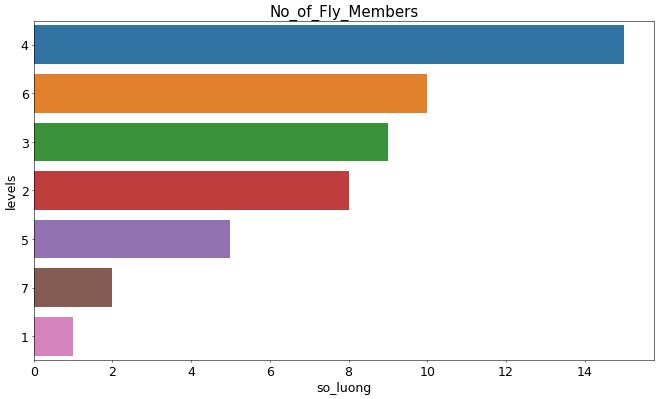

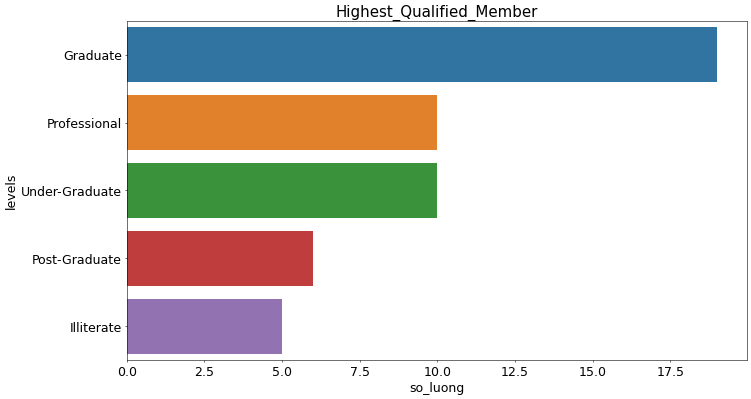

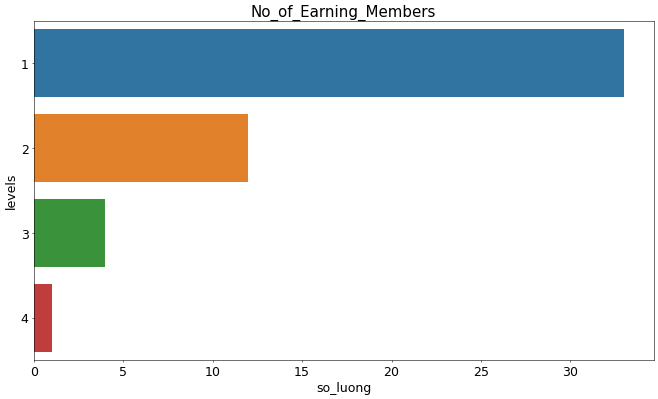

In [29]:
for column in data_dinh_tinh.columns:
    so_luong = []
    levels = []
    
    dem_data = data_dinh_tinh[column].value_counts()
    levels_0 = dem_data.index
    for level in levels_0:
        levels.append(str(level))
        
    for i in dem_data:
        so_luong.append(i)
    p = {'levels':levels, 'so_luong':so_luong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'levels', x = 'so_luong', data = data)
    plt.show()

*Đối với kiểu dữ liệu định lượng thì vẽ histogram*

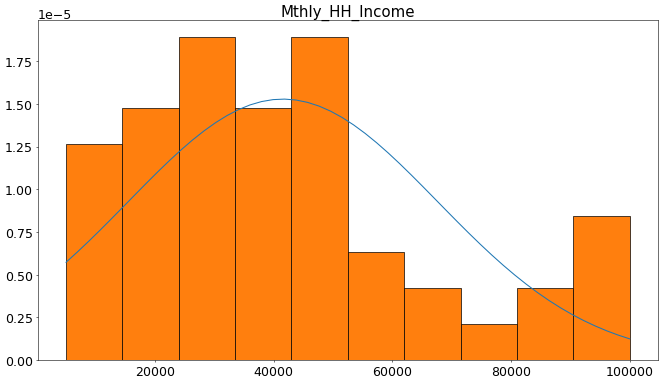

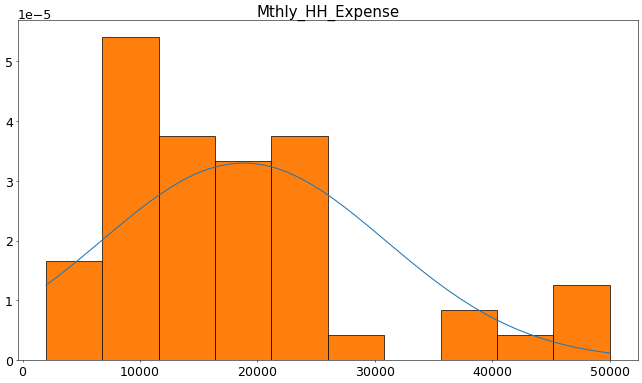

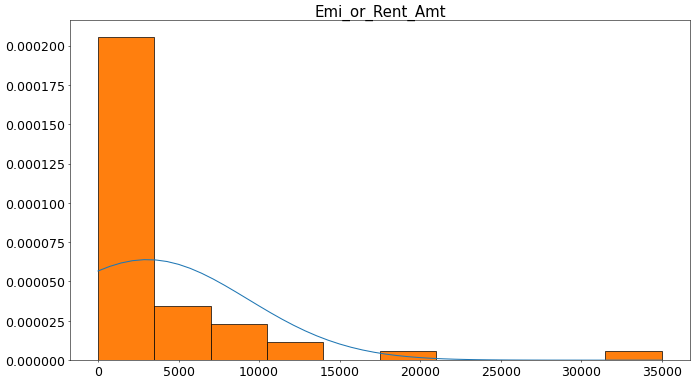

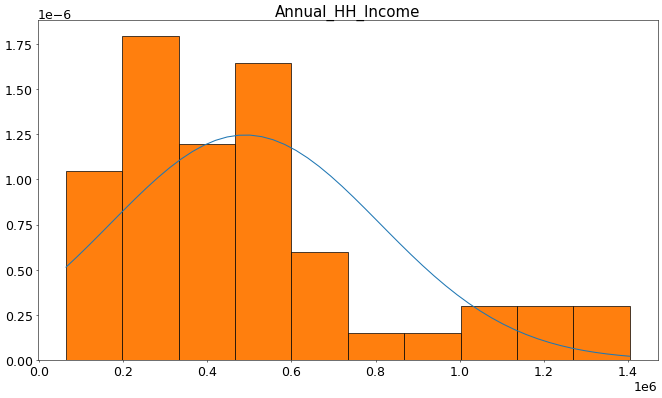

In [58]:
for column in data_dinh_luong.columns:
    data = data_dinh_luong[column]
    # kiem tra data co chuan hay khong?
    mean = np.mean(data)
    # ddof = 1 :: hiệu chỉnh
    std = np.std(data,ddof=1)
    domain = np.linspace(np.min(data),np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    # density = True :: chuẩn hóa dữ liệu vè normal
    plt.hist(data, edgecolor='black', density = True)
    plt.title(column)
    plt.show()